# compare LLM alphas with simulation alphas

In [1]:
# packages and data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from scipy import stats
# read data
alpha_df = pd.read_csv('processed_data/alpha_df.csv')
alpha_df_simulation = pd.read_csv('processed_data/alpha_df_simulation_3.csv')


# merge
alpha_comparison_df = alpha_df.merge(
    alpha_df_simulation,
    on=["experiment", "domain"], 
    how="inner",
    suffixes=("_llm", "_simulation")
)

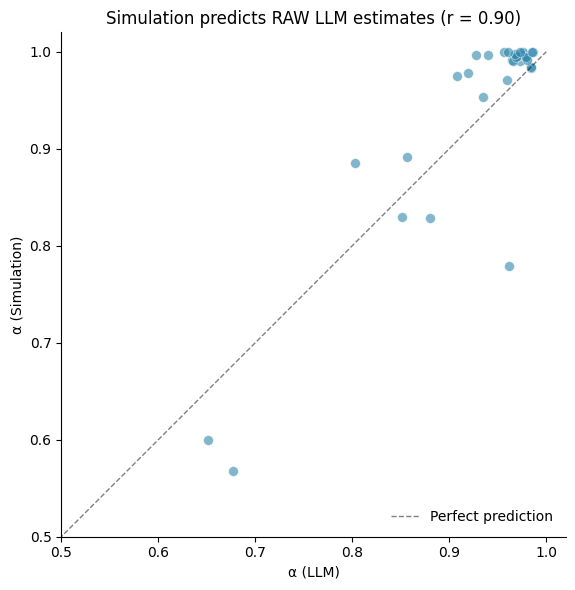

In [14]:
import matplotlib.pyplot as plt
from scipy import stats

# --- Plot 1: Raw alpha ---
fig, ax = plt.subplots(figsize=(6, 6))

x = alpha_comparison_df['alpha_raw_llm']
y = alpha_comparison_df['alpha_raw_simulation']
r, p = stats.pearsonr(x, y)

ax.scatter(x, y, alpha=0.6, s=50, c='#2E86AB', edgecolors='white', linewidth=0.5)
ax.plot([0, 1], [0, 1], 'k--', alpha=0.5, linewidth=1, label='Perfect prediction')

ax.set_xlim(0.5, 1.02)
ax.set_ylim(0.5, 1.02)
ax.set_aspect('equal')
ax.set_xlabel('α (LLM)')
ax.set_ylabel('α (Simulation)')
ax.set_title(f'Simulation predicts RAW LLM estimates (r = {r:.2f})')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(loc='lower right', frameon=False)

plt.tight_layout()
plt.show()

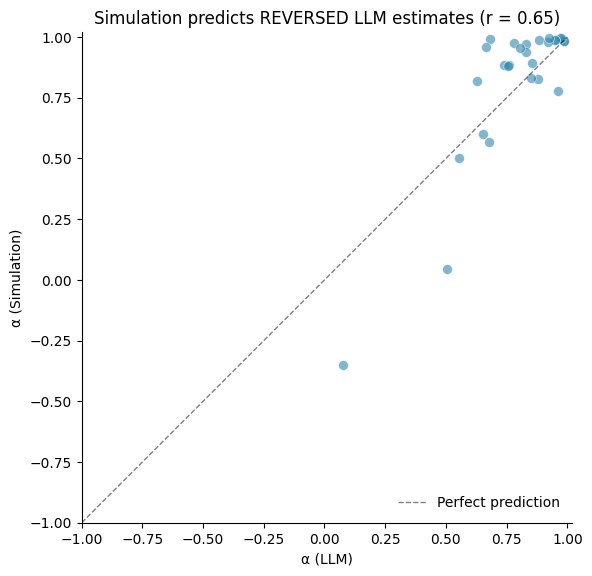

In [12]:
import matplotlib.pyplot as plt
from scipy import stats

# --- Plot 1: Raw alpha ---
fig, ax = plt.subplots(figsize=(6, 6))

x = alpha_comparison_df['alpha_reversed_llm']
y = alpha_comparison_df['alpha_reversed_simulation']
r, p = stats.pearsonr(x, y)

ax.scatter(x, y, alpha=0.6, s=50, c='#2E86AB', edgecolors='white', linewidth=0.5)
ax.plot([-1, 1], [-1, 1], 'k--', alpha=0.5, linewidth=1, label='Perfect prediction')

ax.set_xlim(-1, 1.02)
ax.set_ylim(-1, 1.02)
ax.set_aspect('equal')
ax.set_xlabel('α (LLM)')
ax.set_ylabel('α (Simulation)')
ax.set_title(f'Simulation predicts REVERSED LLM estimates (r = {r:.2f})')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(loc='lower right', frameon=False)

plt.tight_layout()
plt.show()

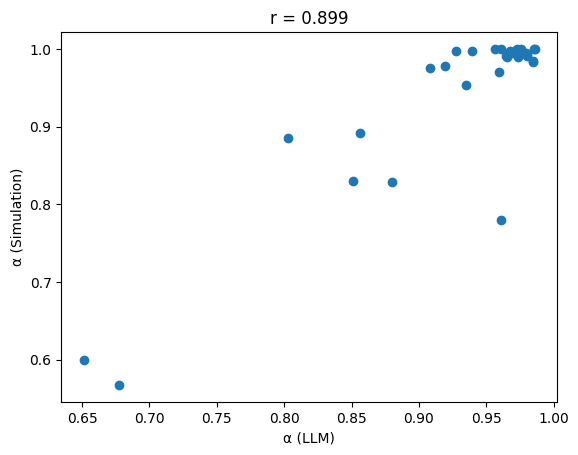

In [2]:
# scatterplot to compare
x, y = alpha_comparison_df['alpha_raw_llm'], alpha_comparison_df['alpha_raw_simulation']
plt.scatter(x, y)
#plt.plot([0.5, 1], [0.5, 1], 'k--')
r, _ = stats.pearsonr(x, y)
plt.xlabel('α (LLM)')
plt.ylabel('α (Simulation)')
plt.title(f'r = {r:.3f}')
plt.show()

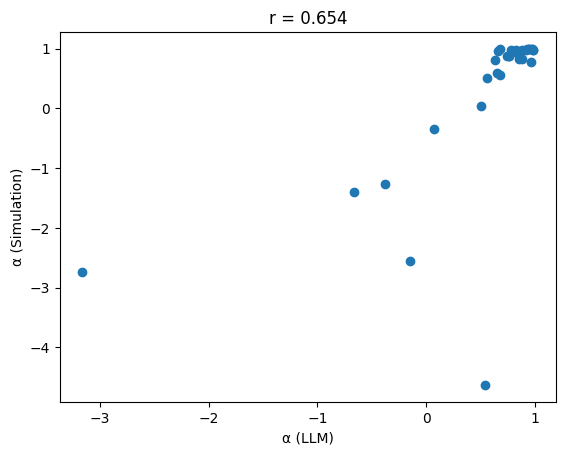

In [3]:
# scatterplot to compare
x, y = alpha_comparison_df['alpha_reversed_llm'], alpha_comparison_df['alpha_reversed_simulation']
plt.scatter(x, y)
r, _ = stats.pearsonr(x, y)
plt.xlabel('α (LLM)')
plt.ylabel('α (Simulation)')
plt.title(f'r = {r:.3f}')
plt.show()